In [63]:

from google.colab import files
 
 
uploaded = files.upload()

Saving UpdatedStudentsPerformance.csv to UpdatedStudentsPerformance.csv


In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msn

In [65]:
df = pd.read_csv("UpdatedStudentsPerformance.csv")

In [66]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [67]:
df.tail(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0
999,female,group D,some college,free/reduced,none,77.0,86.0,86.0


In [68]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [69]:
df.describe()

,math score,reading score,writing score
count,990.000000,985.000000,989.000000
mean,66.208081,69.261929,68.142568
std,15.103724,14.634171,15.199780
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [70]:
df.shape

(1000, 8)

In [71]:
df.size

8000

In [72]:
df.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                      990
reading score                   985
writing score                   989
dtype: int64

In [73]:
df.max()

gender                                     male
race/ethnicity                          group E
parental level of education    some high school
lunch                                  standard
test preparation course                    none
math score                                100.0
reading score                             100.0
writing score                             100.0
dtype: object

In [74]:
df.min()

gender                                          f
race/ethnicity                            group A
parental level of education    associate's degree
lunch                                free/reduced
test preparation course                 completed
math score                                    0.0
reading score                                17.0
writing score                                10.0
dtype: object

In [75]:
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     10
reading score                  15
writing score                  11
dtype: int64

<Axes: >

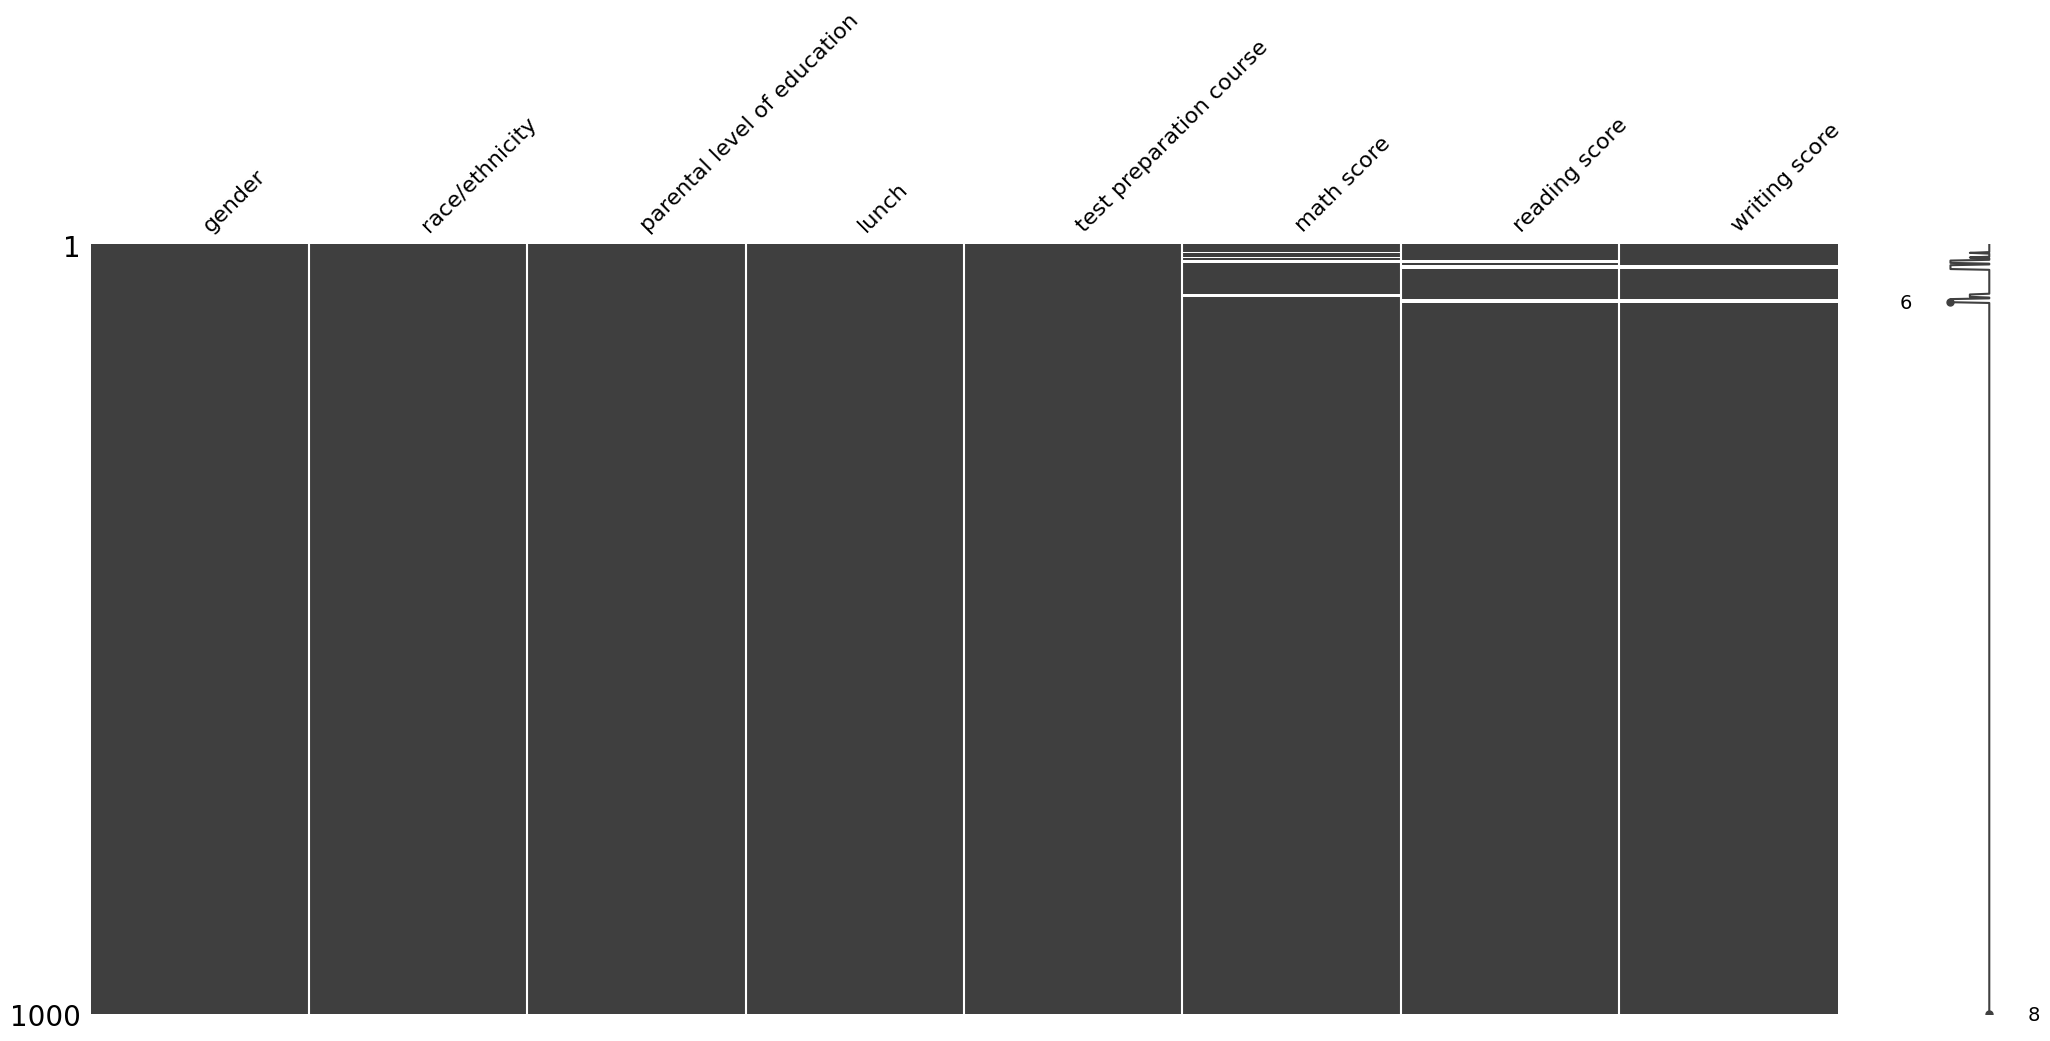

In [76]:
msn.matrix(df)

In [77]:
new_df = df

In [78]:
df['math score'] = df['math score'].fillna(df['math score'].mean())
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                      0
reading score                  15
writing score                  11
dtype: int64

In [79]:
df['reading score'] = df['reading score'].fillna(df['reading score'].median())
df.isna().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                      0
reading score                   0
writing score                  11
dtype: int64

In [82]:
df['writing score'] = df['writing score'].fillna(df['writing score'].mode())
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [83]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


<Axes: >

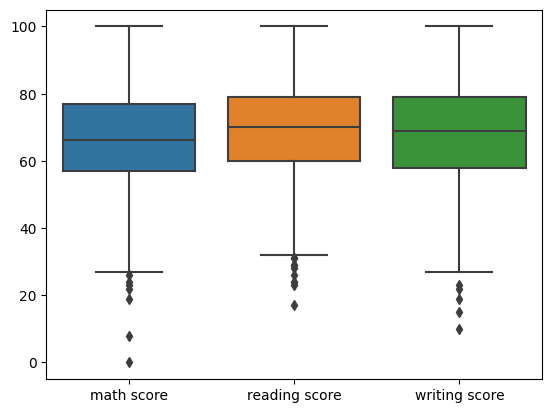

In [84]:
sns.boxplot(df)

In [86]:
new_df = pd.concat([df['math score'],df['reading score'],df['writing score']], axis=1)
new_df

,math score,reading score,writing score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0
...,...,...,...
995,88.0,99.0,95.0
996,62.0,55.0,55.0
997,59.0,71.0,65.0
998,68.0,78.0,77.0


In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_df = scaler.fit_transform(new_df)
new_df = pd.DataFrame(new_df,columns =['math' ,'reading' ,'writing'])
new_df

,math,reading,writing
0,0.72,0.662651,0.711111
1,0.69,0.879518,0.866667
2,0.90,0.939759,0.922222
3,0.47,0.481928,0.377778
4,0.76,0.734940,0.722222
...,...,...,...
995,0.88,0.987952,0.944444
996,0.62,0.457831,0.500000
997,0.59,0.650602,0.611111
998,0.68,0.734940,0.744444
